<a href="https://colab.research.google.com/github/tadeugomes/mba_enap_python/blob/main/CD/Atividades_Exercicios/Aula0_Atividades_Exercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 0 - Atividades e Exercício (vale nota)
### Compartilhe o seu caderno com o professor enviando o link para o seu caderno [neste formulário](https://forms.gle/UYvwc6SpA6HyiqdM6).


In [1]:
import pandas as pd
import seaborn as sns


## Atividade 0.1
### Considere o seguinte dataset

In [2]:
url='https://docs.google.com/spreadsheets/d/16B0uAFH1hubqvXytaxEkh9J8fXAJugYi/edit?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_orders = pd.read_excel(url2, sheet_name='Orders')
df_orders.head()

,ProductID,ProductName,Price,OrderID,CustomerID,EmployeeID,OrderDate,ShipperID,OrderDetailID,Quantity,FirstName,LastName,CategoryID,CategoryName
0,11,Queso Cabrales,21.00,10248,90,5,1996-07-04,3,1,12,Steven,Buchanan,4,Dairy Products
1,42,Singaporean Hokkien Fried Mee,14.00,10248,90,5,1996-07-04,3,2,10,Steven,Buchanan,5,Grains/Cereals
2,72,Mozzarella di Giovanni,34.80,10248,90,5,1996-07-04,3,3,5,Steven,Buchanan,4,Dairy Products
3,14,Tofu,23.25,10249,81,6,1996-07-05,1,4,9,Michael,Suyama,7,Produce
4,51,Manjimup Dried Apples,53.00,10249,81,6,1996-07-05,1,5,40,Michael,Suyama,7,Produce



#### Usando o plotnine, trace um gráfico temporal (de linha) com o faturamento/venda ($) total de cada categoria desta tabela. Pense em qual a escala temporal mais apropriada para analisar os dados. Diario? Semanal? Mensal?


In [7]:
df_orders['OrderMonth'] = df_orders['OrderDate'].dt.to_period('M').dt.to_timestamp()
df_monthly_revenue = df_orders.groupby(['OrderMonth', 'CategoryName'])['Price'].sum().reset_index()
display(df_monthly_revenue.head())

,OrderMonth,CategoryName,Price
0,1996-07-01,Beverages,168.0
1,1996-07-01,Condiments,110.8
2,1996-07-01,Confections,249.1
3,1996-07-01,Dairy Products,356.9
4,1996-07-01,Grains/Cereals,112.0


In [14]:
from plotnine import (
    ggplot,
    aes,
    geom_line,
    labs,
    theme
)

p = (
    ggplot(df_monthly_revenue, aes(x='OrderMonth', y='Price', color='CategoryName'))
    + geom_line()
    + labs(
        title='Monthly Revenue by Category',
        x='Month',
        y='Total Revenue ($)',
        color='Category'
    )
    + theme(figure_size=(10, 6))
)
print(p)

<ggplot: (1000 x 600)>


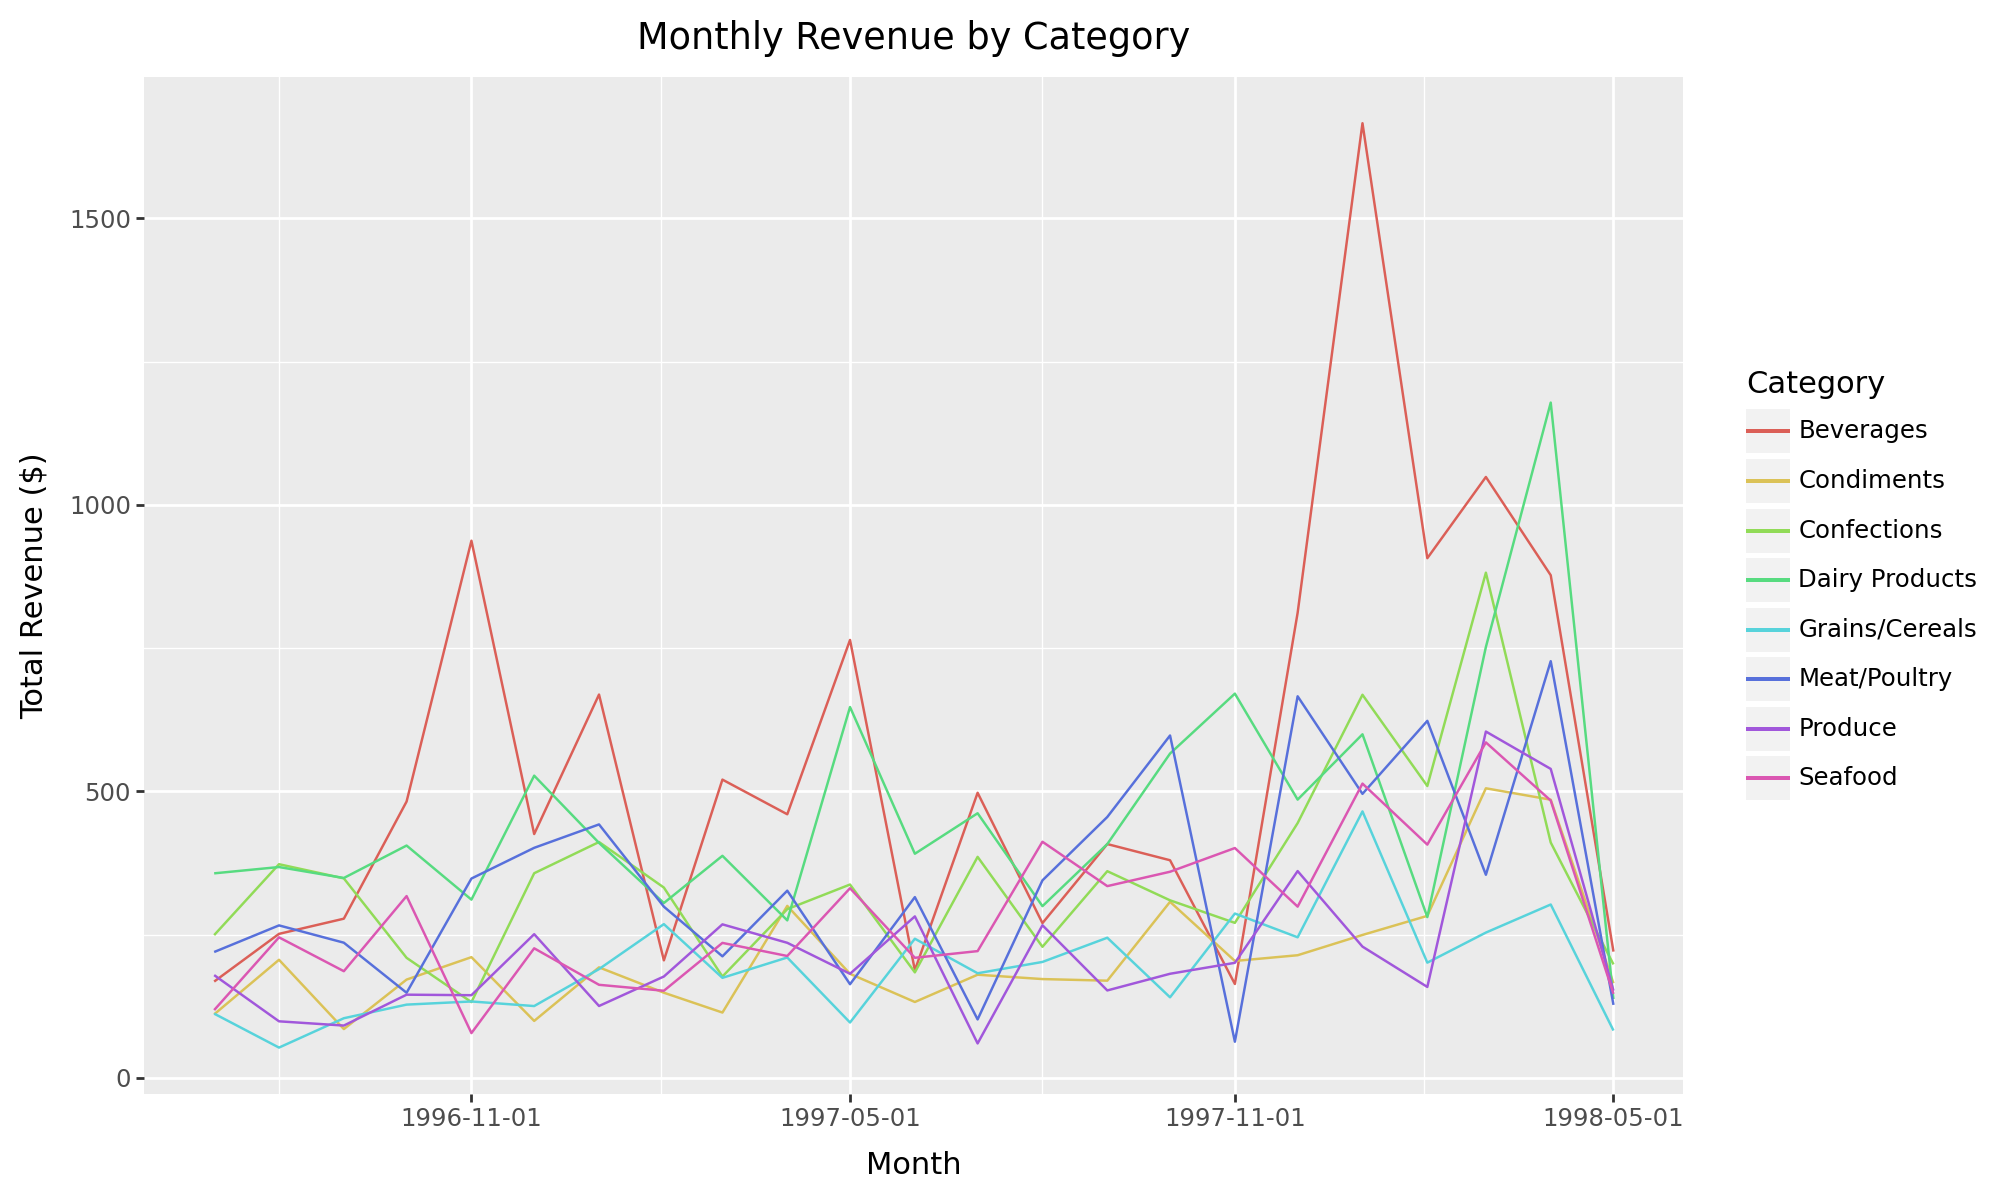

In [15]:
# Create the line plot


## Atividade 0.2

### Faça uma query para contabilizar, por UF do estabelecimento de vacinação e vacina, quantas pessoas não tomaram a segunda dose da vacina contra a COVID-19 e o prazo para tomá-la já expirou.
#### Considere que o prazo para tomar a 2a dose da Coronavac é 30 dias, e o prazo para tomar a 2a dose da Pfizer e da Astrazeneca é 90 dias.
#### Você vai precisar informar um project id criado por você na GCP, conforme explicado na aula. Replico aqui os links de tutoriais

> Use o [Cloud Resource Manager](https://console.cloud.google.com/cloud-resource-manager) para **criar um projeto na Google Cloud Platform (GCP)**, se você ainda não tem um.
>
> [Habilite as APIs do BigQuery](https://console.cloud.google.com/flows/enableapi?apiid=bigquery) para o projeto.


##### Dica 1: Esta é uma tabela que guarda transações, e não entidades
##### Dica 2: Limite suas queries ao estado do Acre para não acabar com a sua cota do sandbox.
##### Dica 3: **Faça primeiro a query funcionar no editor de SQL do bigquery** e depois coloque o código aqui. Por que?
##### Obs.: As atividades práticas da próxima aula serão outras. Não haverá tempo na próxima aula para resolver esse exercício. Apenas, será apresentada a solução. Se quiser tentar fazer sozinho, tente antes da próxima aula.

In [17]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [33]:
%%bigquery df --project enap-mba-470912

SELECT
    vagg.vacina,
    vagg.sigla_uf, -- Mantendo a UF conforme sua solicitação anterior
    COUNT(DISTINCT vagg.id_paciente) AS total_pacientes_sem_segunda_dose
FROM
    `basedosdados.br_ms_vacinacao_covid19.microdados_vacinacao` vagg
WHERE
    vagg.id_paciente IN (
        SELECT DISTINCT v.id_paciente
        FROM `basedosdados.br_ms_vacinacao_covid19.microdados_vacinacao` v
        WHERE v.vacina != '88'
        GROUP BY v.id_paciente
        HAVING MIN(v.data_aplicacao) = MAX(v.data_aplicacao)
    )
GROUP BY
    vagg.vacina,
    vagg.sigla_uf -- Agrupando por UF também, para obter a contagem por vacina e por estado
ORDER BY
    vagg.vacina,
    vagg.sigla_uf;

Query is running:   0%|          |

Downloading:   0%|          |

In [34]:
df.head()

,vacina,sigla_uf,total_pacientes_sem_segunda_dose
0,85,AC,29501
1,85,AL,91248
2,85,AM,214957
3,85,AP,44935
4,85,BA,607019


### Atividade 0.3
Faça um gráfico de barras contendo esta informação. Não precisa carregar todos os dados da tabela, por simplicidade e economia de quota, plote um extrato menor apenas para demonstrar o conceito.
#### Obs.: hardy-messenger-229417 é o project-id do projeto do professor, **troque pelo seu project-id**

Faça um gráfico semelhante a este
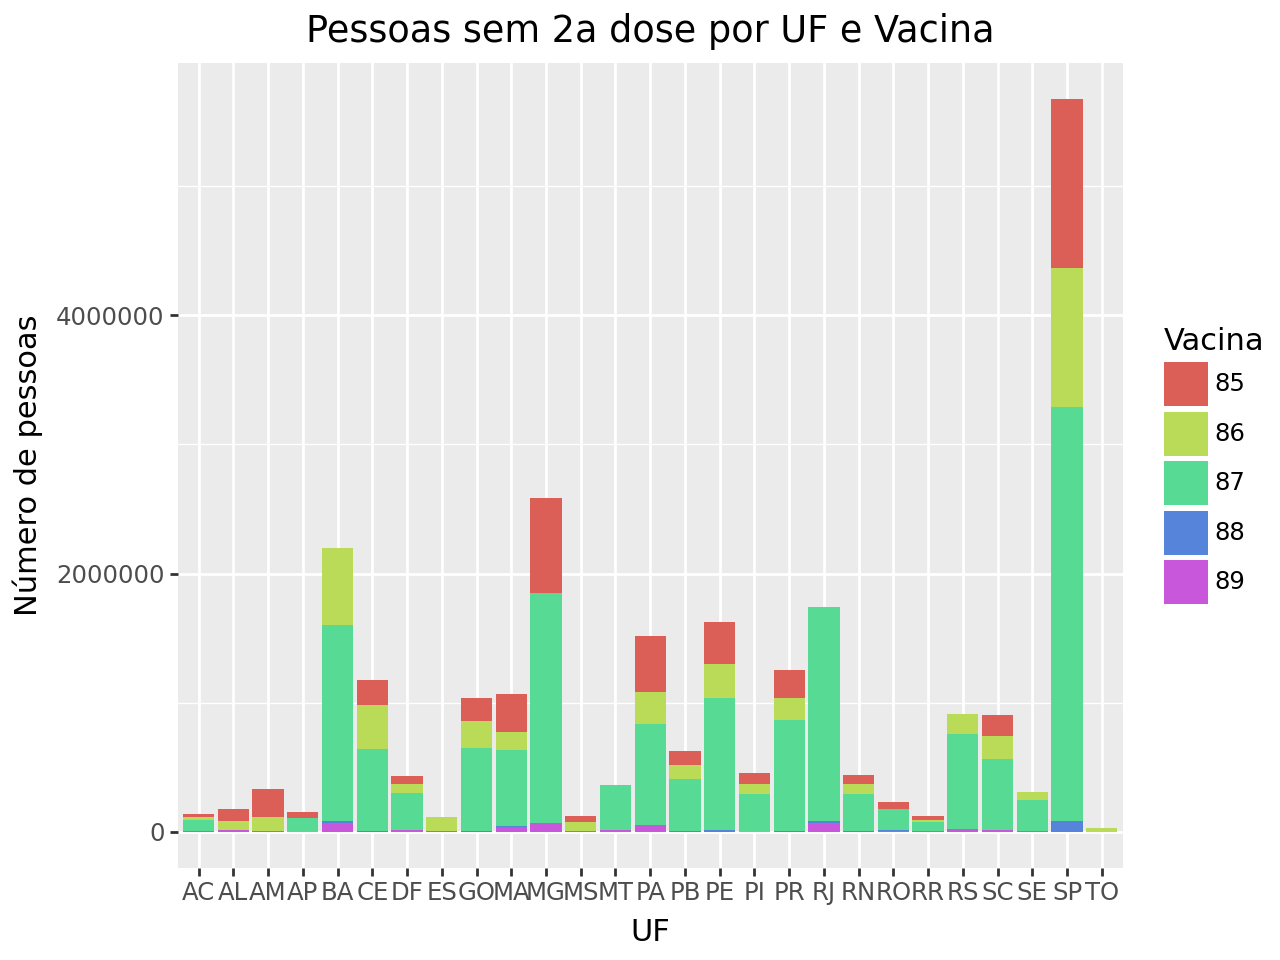

In [35]:
from plotnine import (
    ggplot,
    aes,
    geom_bar,
    labs,
    theme
)

p = (
    ggplot(df, aes(x='sigla_uf', fill='vacina', y = "total_pacientes_sem_segunda_dose"))
    + geom_bar(stat='identity')
    + labs(
        title='Pessoas sem 2a dose por UF e Vacina',
        x='UF',
        y='Número de pessoas',
        fill='Vacina'
    )
    + theme(figure_size=(12, 6))
)
print(p)

<ggplot: (1200 x 600)>


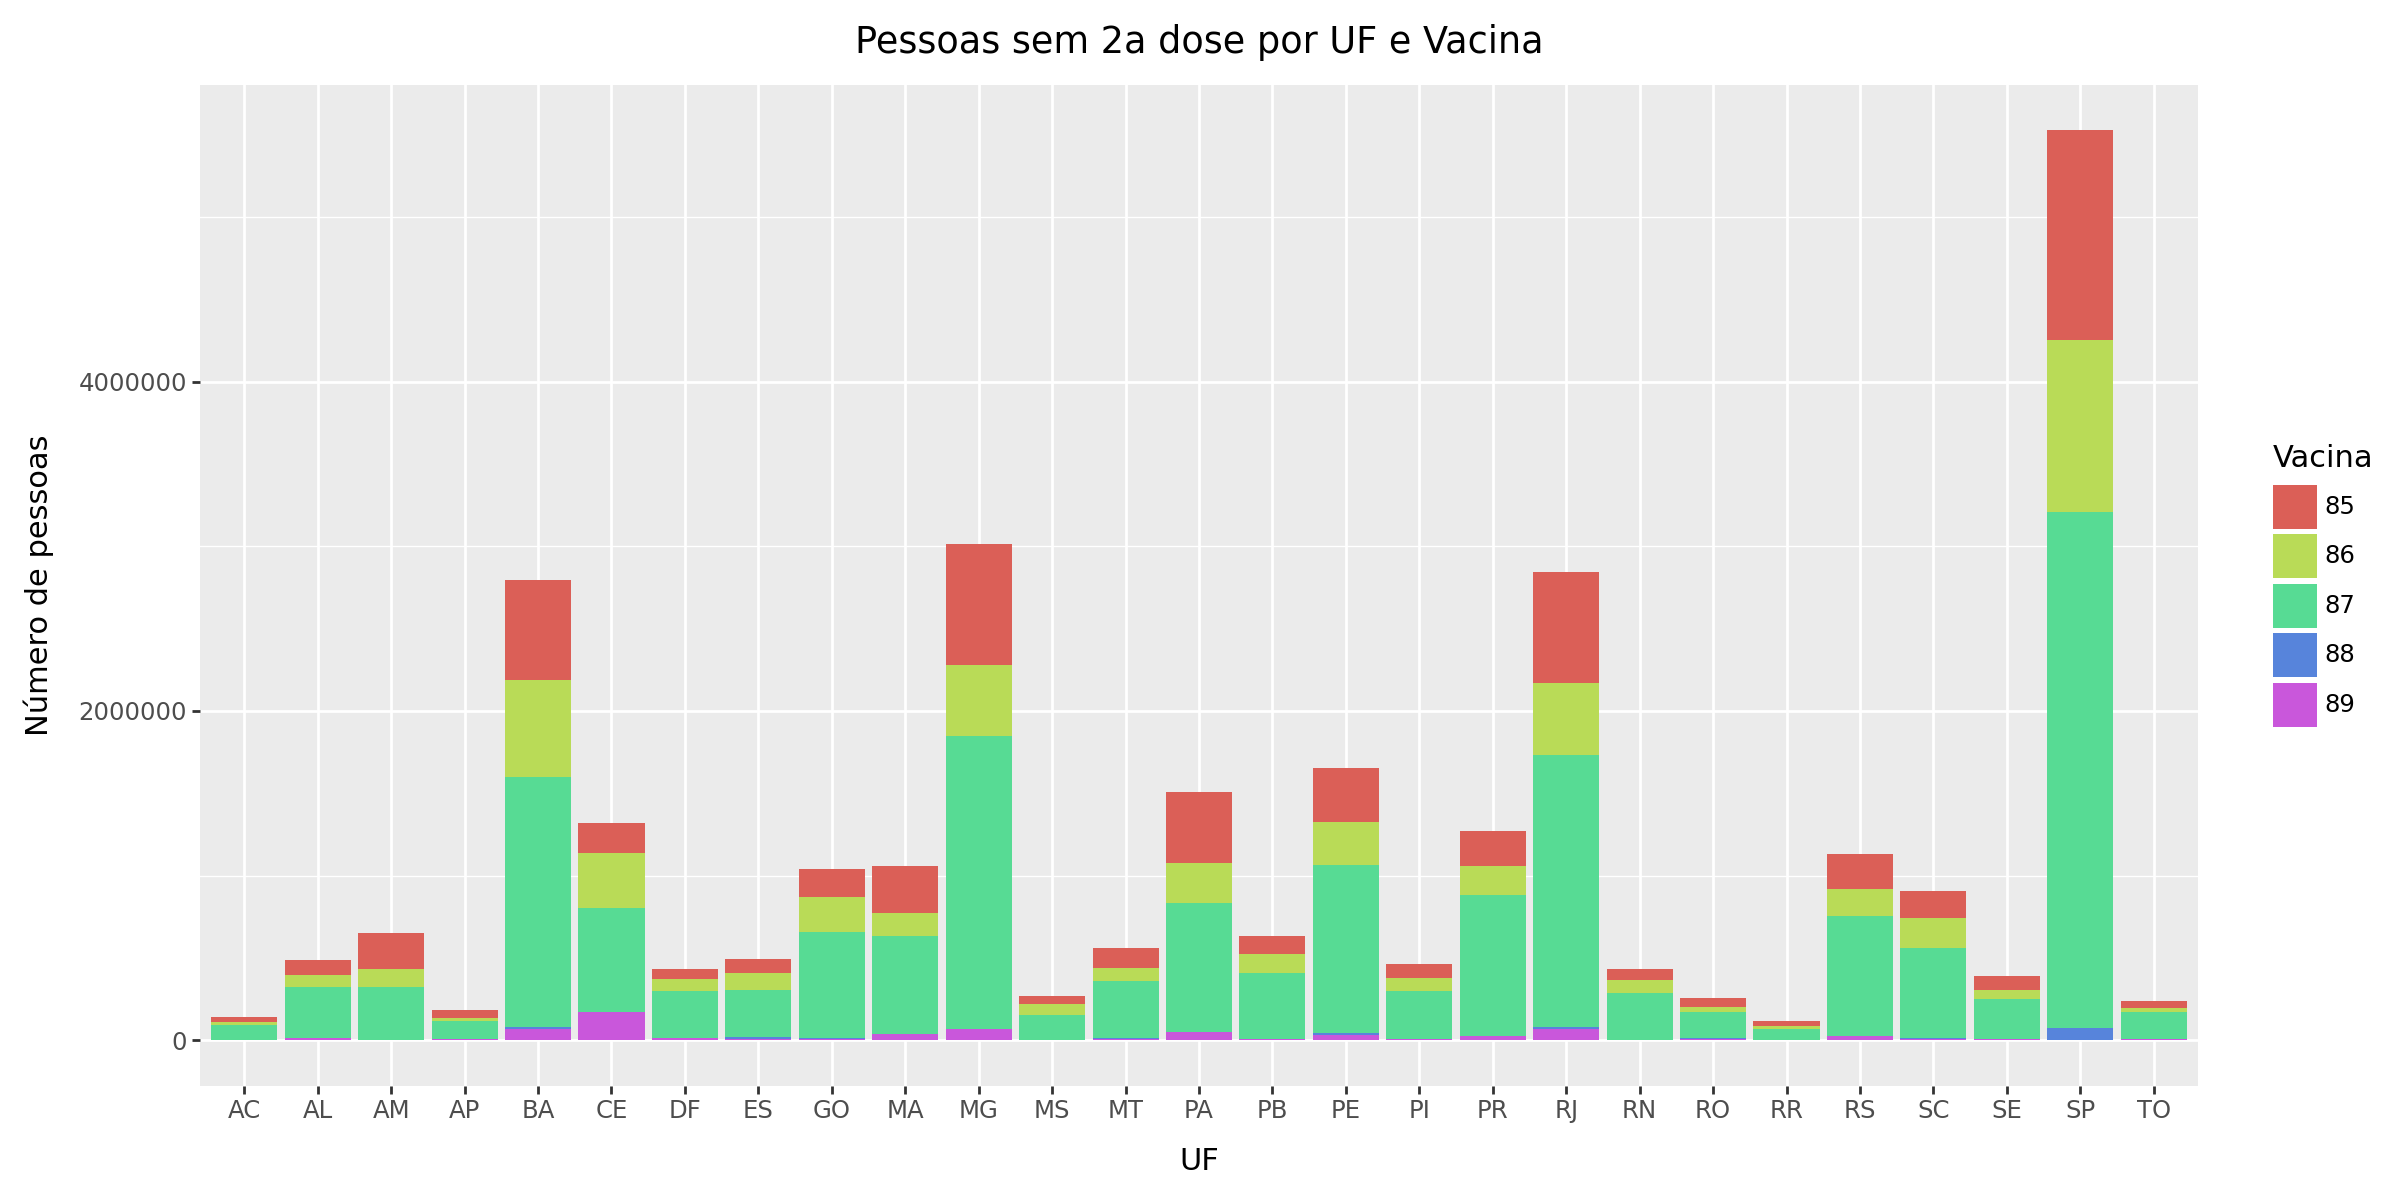

In [36]:
display(p)

### Exercício 0.1
#### Usando o plotnine, produza um gráfico equivalente ao gráfico abaixo, mas no contexto do índice de gini dos municípios brasileiros. Os dados do índice de gini encontram-se aqui https://github.com/alexlopespereira/mba_enap/raw/refs/heads/main/data/originais/gini/ginibr.csv. Este [tutorial no youtube](https://youtu.be/q816IZuqVNo?t=242) demonstra passo a passo como esse gráfico foi produzido.
#### Adaptações ao nosso exercício:

1.   Considere que as espécies (do gráfico abaixo) serão os anos 1991, 2000 e 2010 (que são colunas do dataset do índice de gini)
2.   E que a variável sexo será representada por Norte (UFs do Norte e Nordeste) e Sul (Sudeste, centro-oeste e sul). Não há um juízo de valor aqui, só uma maneira de criar uma variável binária e criar uma equivalência ao gráfico abaixo.



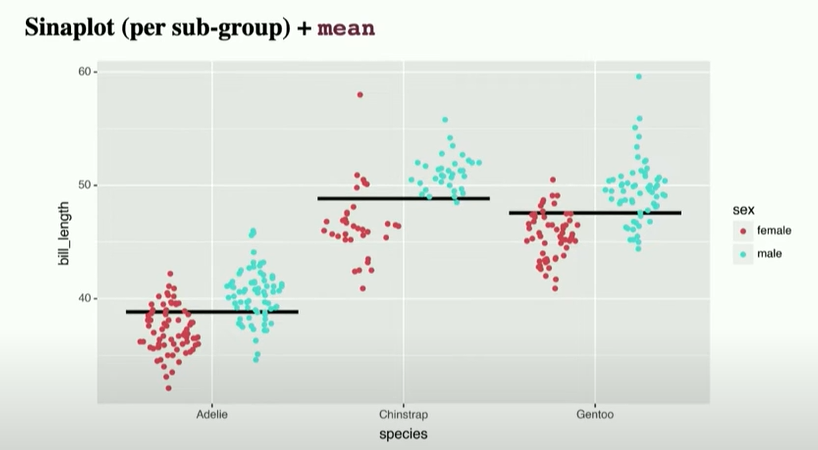

In [61]:
import pandas as pd

url = 'https://github.com/alexlopespereira/mba_enap/raw/refs/heads/main/data/originais/gini/ginibr.csv'
# The error suggests the delimiter might not be a comma.
# Try specifying the correct delimiter using the 'sep' parameter, e.g., sep=';' or sep='\t'
df_gini = pd.read_csv(url, sep=';', header=1) # Read with header in the second row
df_gini.columns = ['municipio', '1991', '2000', '2010'] # Rename columns
# Drop the first row and the last two rows
df_gini = df_gini.drop([0, 5566, 5567]).reset_index(drop=True) # Corrected indices to drop
# Extract IBGE code and clean up the 'municipio' column
df_gini['cod_ibge'] = df_gini['municipio'].str.extract(r'(\d+)')
df_gini['municipio'] = df_gini['municipio'].str.replace(r'\d+\s', '', regex=True)
display(df_gini.head())

,municipio,1991,2000,2010,cod_ibge
0,Alta Floresta D'Oeste,"0,5983","0,5868","0,5893",110001
1,Alto Alegre dos Parecis,...,"0,508","0,5491",110037
2,Alto Paraíso,...,"0,6256","0,5417",110040
3,Alvorada D'Oeste,"0,569","0,6534","0,5355",110034
4,Ariquemes,"0,5827","0,5927","0,5496",110002


In [63]:
df_gini['uf'] = df_gini['cod_ibge'].str[:2]
display(df_gini.head())

,municipio,1991,2000,2010,cod_ibge,uf
0,Alta Floresta D'Oeste,"0,5983","0,5868","0,5893",110001,11
1,Alto Alegre dos Parecis,...,"0,508","0,5491",110037,11
2,Alto Paraíso,...,"0,6256","0,5417",110040,11
3,Alvorada D'Oeste,"0,569","0,6534","0,5355",110034,11
4,Ariquemes,"0,5827","0,5927","0,5496",110002,11


,municipio,1991,2000,2010,cod_ibge,uf,grupo
0,Alta Floresta D'Oeste,"0,5983","0,5868","0,5893",110001,11,Norte
1,Alto Alegre dos Parecis,...,"0,508","0,5491",110037,11,Norte
2,Alto Paraíso,...,"0,6256","0,5417",110040,11,Norte
3,Alvorada D'Oeste,"0,569","0,6534","0,5355",110034,11,Norte
4,Ariquemes,"0,5827","0,5927","0,5496",110002,11,Norte


In [76]:
# Calculate the mean gini for each UF and year
df_gini_mean_by_uf_year = df_long.groupby(['uf', 'ano'])['gini'].mean().reset_index()
df_gini_mean_by_uf_year['grupo'] = np.where(df_gini_mean_by_uf_year['uf'].isin(norte_nordeste), 'Norte', 'Sul')

# Display the new DataFrame
display(df_gini_mean_by_uf_year.head())

,uf,ano,gini,grupo
0,11,1991,0.586809,Norte
1,11,2000,0.589750,Norte
2,11,2010,0.536892,Norte
3,12,1991,0.555500,Norte
4,12,2000,0.606527,Norte


,Município,cod_ibge,uf,grupo,ano,gini
0,110001 Alta Floresta D'Oeste,110001,11,Norte,1991,0.5983
3,110034 Alvorada D'Oeste,110034,11,Norte,1991,0.5690
4,110002 Ariquemes,110002,11,Norte,1991,0.5827
6,110003 Cabixi,110003,11,Norte,1991,0.6527
8,110004 Cacoal,110004,11,Norte,1991,0.6800


In [ ]:
# Calculate the mean gini for each UF and year
df_gini_mean_by_uf_year = df_long.groupby(['uf', 'ano'])['gini'].mean().reset_index()
df_gini_mean_by_uf_year['grupo'] = np.where(df_gini_mean_by_uf_year['uf'].isin(norte_nordeste), 'Norte', 'Sul')

# Display the new DataFrame
display(df_gini_mean_by_uf_year.head())

,uf,ano,gini,grupo
0,11,1991,0.586809,Norte
1,11,2000,0.589750,Norte
2,11,2010,0.536892,Norte
3,12,1991,0.555500,Norte
4,12,2000,0.606527,Norte


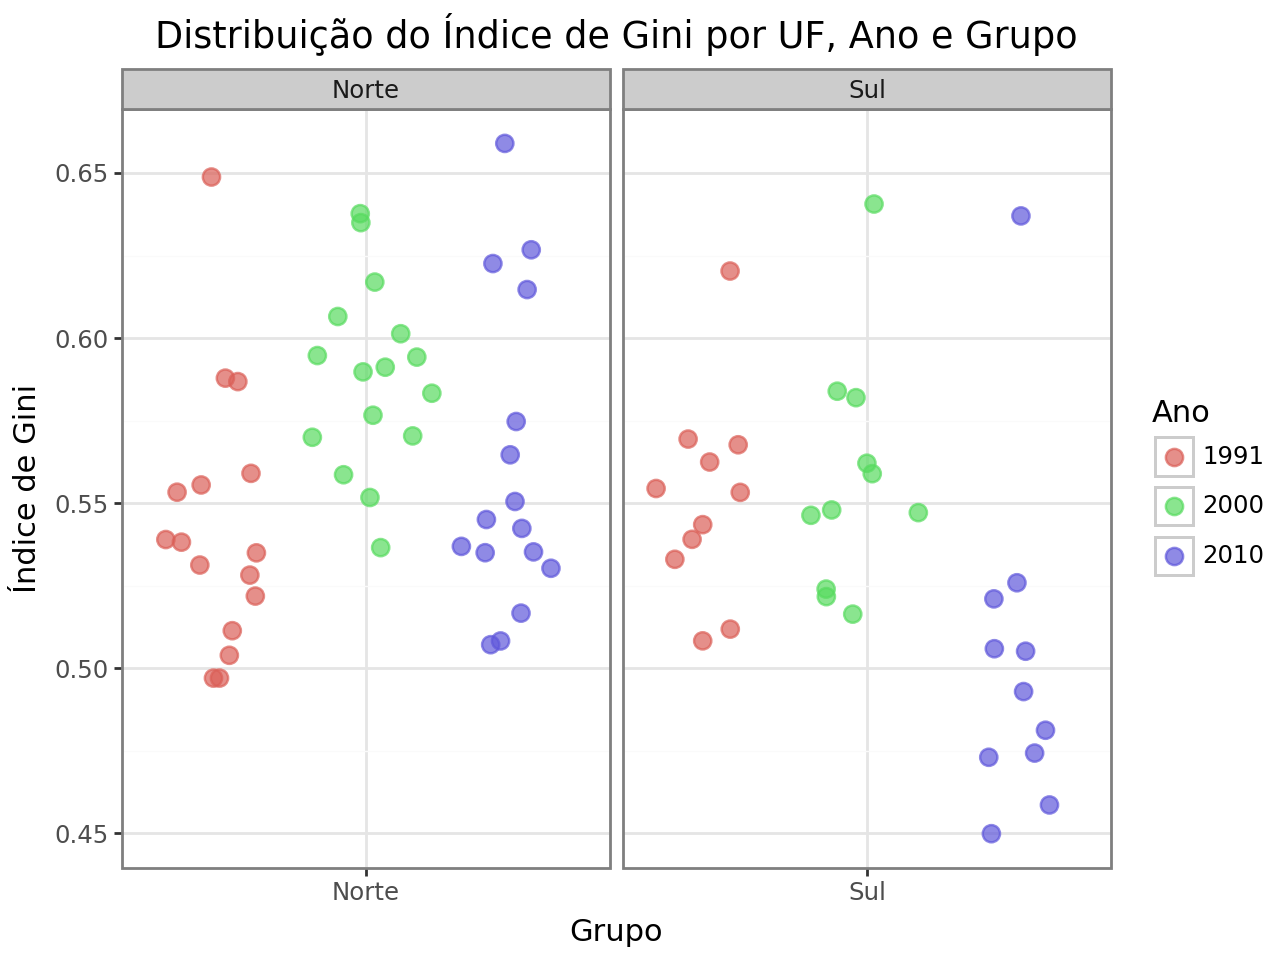

In [88]:
from plotnine import ggplot, aes, geom_sina, facet_wrap, theme_bw, labs

# Gráfico com distribuição por grupo e cor diferenciando os anos
(
    ggplot(df_gini_mean_by_uf_year, aes(x="grupo", y="gini", color="factor(ano)"))
    + geom_sina(size=3, alpha=0.7)
    + facet_wrap("~grupo", scales="free_x")  # opcional: cria painéis por grupo
    + theme_bw()
    + labs(
        title="Distribuição do Índice de Gini por UF, Ano e Grupo",
        x="Grupo",
        y="Índice de Gini",
        color="Ano"
    )
)